In [ ]:
# Parameter optimization

In [ ]:
# new value = oldvalue - step size( learning rate * slope)

In [ ]:
# Sampling - Why & How # statistics
#  Understanding confidence interval and p-value ( statistics)
#  Null & Alternate Hypothesis ( statistics)
#  Tests of Significance ( statistics)
#  ANOVA ( statistics)
#  Chi-Square Test ( statistics)
# Gradient Descent Algorithm ( today )
# Regularized Regression Methods - Ridge (taught), Lasso, Elastic Net (will do that)
# CountVectorizer ( done )
#  TfIdf ( done )
#  HashingVectorizer ( explain)
#  Image using skimage (today)
# Naive Bayes Classifier ( done)
#  Gaussian Naive Bayes ( done)
#  Multinomial Naive Bayes ( done)
#  Bernoulli’s Naive Bayes ( done)
#  Naive Bayes for out-of-core (done)
#  Model Persistence (done)
#  Validation Curves ( today)(GD)
#  Learning Curves ( GD)
# Chi-squared stats ( statistics)
#  ANOVA using f_classif ( statistics)
#  F-score vs Mutual Information ( statistics)
#  Mutual Information for discrete value ( statistics)
#  Mutual Information for continues value ( statistics)
#  SelectKBest ( elbow method)
#  SelectPercentile
#  SelectFromModel ()
#  Recursive Feature Elimination ( PCA )
#  SVD (don't have into our module)
# Anomaly Detection (credit, done)
#  What are Outliers ? ( done )
#  Statistical Methods for Univariate Data ( linear & multiple )
#  Using Gaussian Mixture Models ( Not in module)
#  Fitting an elliptic envelope ( Not in module)
#  Isolation Forest ( Not in module)(anomaly detection)
#  Local Outlier Factor
#  Using clustering method like DBSCAN ( Not in module)
# OverSampling ( Done)
#  UnderSampling ( done)


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',' horse', 'ship', 'truck']

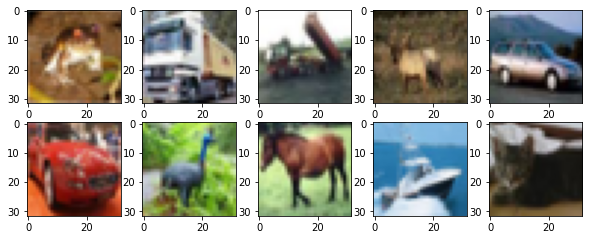

In [ ]:
plt.figure(figsize = (10,10))
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.imshow(train_images[i])
plt.show()

In [ ]:
model = models.Sequential()


In [ ]:
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))

In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.3720 - accuracy: 0.5043 - val_loss: 1.2473 - val_accuracy: 0.5600
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1071 - accuracy: 0.6088 - val_loss: 1.0218 - val_accuracy: 0.6402
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9743 - accuracy: 0.6587 - val_loss: 0.9912 - val_accuracy: 0.6465
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8834 - accuracy: 0.6904 - val_loss: 0.8949 - val_accuracy: 0.6896
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8091 - accuracy: 0.7169 - val_loss: 0.8692 - val_accuracy: 0.7017
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7551 - accuracy: 0.7358 - val_loss: 0.8679 - val_accuracy: 0.6997
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7080 - accuracy: 0.7501 - val_loss: 0.8706 -

Text(0, 0.5, 'accuracy')

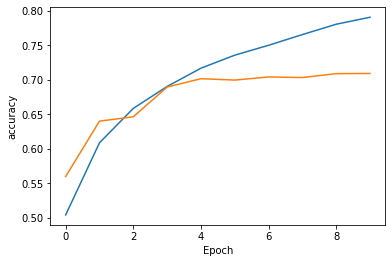

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')